In [1]:
# load libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# Plot style (optional)
sns.set(style="whitegrid")

In [2]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [3]:
# load processed data
df = pd.read_csv("/Users/DadaOlayemi/Gaming_Habits/processed/Gaming_Habits_processed.csv")
df.head()

,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,21,Male,Working Professional,Action,4.00,28.00,Morning,4.60,6,4,69,66,Negative
1,35,Female,Student,Sports,1.00,7.00,Night,5.40,2,7,67,72,Neutral
2,26,Male,Student,Puzzle,2.00,14.00,Morning,8.00,4,8,82,82,Positive
3,32,Male,Working Professional,Action,1.00,7.00,Night,4.90,7,7,71,66,Neutral
4,19,Male,Working Professional,Action,2.10,14.70,Morning,7.00,7,7,67,63,Neutral


In [4]:
# check columns and types
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Gender                  1000 non-null   object 
 2   Occupation              1000 non-null   object 
 3   Game_Type               1000 non-null   object 
 4   Daily_Gaming_Hours      1000 non-null   float64
 5   Weekly_Gaming_Hours     1000 non-null   float64
 6   Primary_Gaming_Time     1000 non-null   object 
 7   Sleep_Hours             1000 non-null   float64
 8   Stress_Level            1000 non-null   int64  
 9   Focus_Level             1000 non-null   int64  
 10  Academic_or_Work_Score  1000 non-null   int64  
 11  Productivity_Level      1000 non-null   int64  
 12  Performance_Impact      1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 101.7+ KB


,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,26.60,3.32,23.24,6.48,5.45,6.07,75.08,75.28
std,5.21,1.61,11.29,1.16,2.28,2.01,11.67,12.06
min,18.00,0.50,3.50,4.50,2.00,3.00,55.00,50.00
25%,22.00,2.00,14.00,5.47,3.00,4.00,65.00,65.00
50%,27.00,3.30,23.10,6.50,5.00,6.00,75.00,75.00
75%,31.00,4.80,33.60,7.50,7.00,8.00,85.00,86.00
max,35.00,6.00,42.00,8.50,9.00,9.00,95.00,100.00


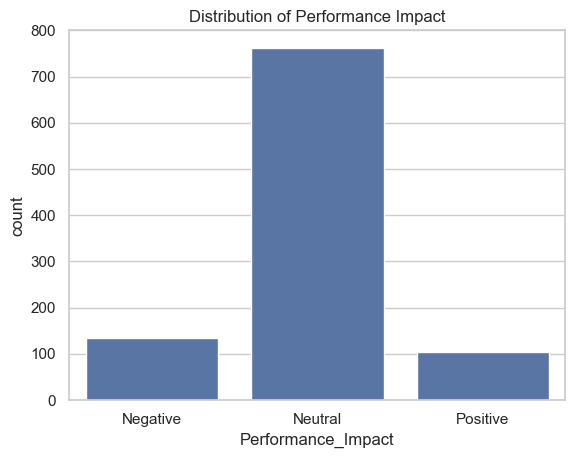

In [5]:
# target variable exploration
df["Performance_Impact"].value_counts()
sns.countplot(x="Performance_Impact", data=df)
plt.title("Distribution of Performance Impact")
plt.show()

# Exploratory Data Analysis (EDA)


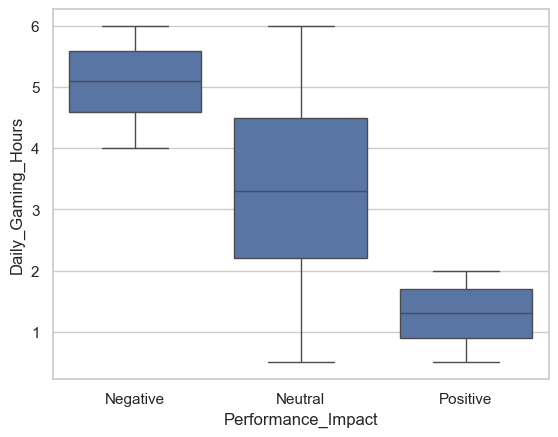

In [6]:
# gaming vs productivity
sns.boxplot(x="Performance_Impact", y="Daily_Gaming_Hours", data=df)
plt.show()

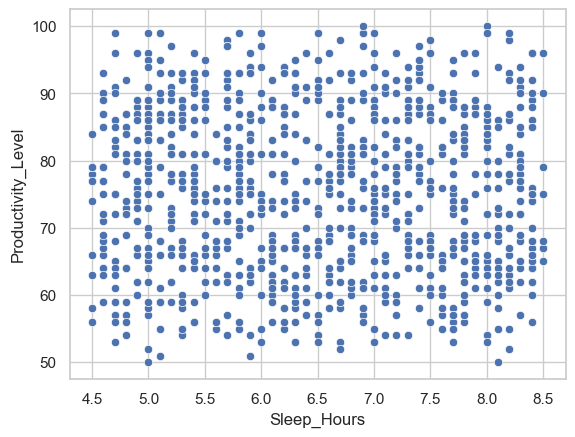

In [7]:
# sleep vs productivity
sns.scatterplot(x="Sleep_Hours", y="Productivity_Level", data=df)
plt.show()

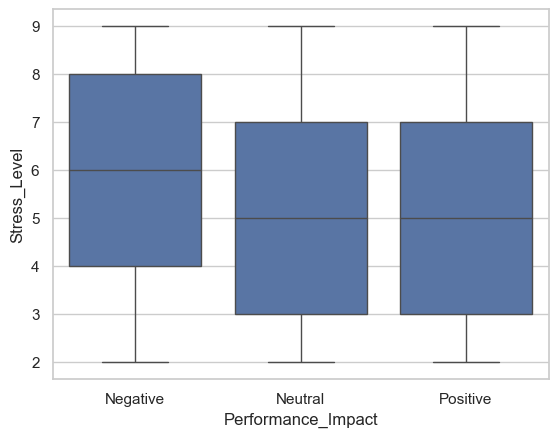

In [8]:
# stress vs focus
sns.boxplot(x="Performance_Impact", y="Stress_Level", data=df)
plt.show()

# Encode Categorical Variable

In [9]:
# prepare for modeling
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
# define features and target
X = df_encoded.drop("Performance_Impact_Positive", axis=1)
y = df_encoded["Performance_Impact_Positive"]

In [12]:
# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'
